# Data Visualization

### Imports

In [1]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use("fivethirtyeight")
sns.set_theme(rc = {"figure.max_open_warning": 0})

In [2]:
class PitchLeaderboard:
    
    def __init__(self, file, pitch_type, category, length, qualifier_mark, orientation):
        
        """
        Initialize the Leaderboard class.

        Parameters:
            pitch_type (str): The column name to be used for the pitch type of the leaderboard.
            category (str): The column name to be used for sorting the leaderboard.
            length (int): The number of top records to display in the leaderboard.
            qualifier_mark (int): The minimum pitch count required to qualify for the leaderboard.
            orientation (bool): Set True for ascending sorting, False for descending sorting.
        """
        
        self.file = file
        self.pitch_type = pitch_type
        self.category = category
        self.length = length
        self.qualifier_mark = qualifier_mark
        self.orientation = orientation
        
    def generate_leaderboard(self):
        
        """
        Generate the leaderboard using the provided DataFrame.

        Returns:
            pd.DataFrame: The sorted leaderboard DataFrame.
        """
        
        # Create the DataFrame for Statistic Extraction
        df = pd.read_feather(self.file)
        df.loc[:, "pitch_count"] = df.groupby(["player_name", "pitch_type"])["player_name"].transform("count")
        
        if self.pitch_type is not None:
            df = df[df["pitch_type"] == self.pitch_type].reset_index(drop = True)
        
        # Create a Copy of the DataFrame and Group By player_name and pitch_type, Calculating the Mean.
        df_leaderboard = df.copy(deep = True).groupby(["player_name", "pitch_type"]).mean(numeric_only = True)

        # Filter the leaderboard Based on the ualifier_mark and Sort by the Specified Category.
        filtered_leaderboard = df_leaderboard[df_leaderboard["pitch_count"] >= self.qualifier_mark]
        sorted_leaderboard = filtered_leaderboard.sort_values([self.category], ascending = self.orientation)
        
        if self.category.endswith("%"):
            sorted_leaderboard[self.category] = sorted_leaderboard[self.category].astype(float).round(3)
        elif self.category.endswith("+"):
            sorted_leaderboard[self.category] = sorted_leaderboard[self.category].astype(float).round(3)

        # Return the leaderboard.
        return pd.DataFrame(sorted_leaderboard.head(self.length)[self.category])

In [3]:
PitchLeaderboard(file = "C:/Users/ryana/Downloads/Optimized Pitch Arsenals/files/pitch_grades/pitch_grades_2022.feather", pitch_type = "FF", category = "Stuff+", length = 10, qualifier_mark = 50, orientation = True).generate_leaderboard()

,,Stuff+
player_name,pitch_type,
"Kelly, Carson",FF,50.503
"Phillips, Brett",FF,57.057
"Alberto, Hanser",FF,58.324
"Ashby, Aaron",FF,59.922
"Valdez, Framber",FF,64.458
"Gordon, Nick",FF,69.518
"Webb, Logan",FF,72.071
"Harrison, Josh",FF,72.703
"VanMeter, Josh",FF,74.632


In [136]:
from pybaseball import pitching_stats_bref
data_2023 = pitching_stats_bref(2023)
data_2023

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID
1,Fernando Abad,37,118,Maj-NL,Colorado,6,0,1.0,NaN,NaN,...,0.16,0.03,0.37,0.26,0.04,2.211,0.360,2.8,0.67,472551
2,Andrew Abbott,24,47,Maj-NL,Cincinnati,21,21,8.0,6.0,NaN,...,0.16,0.11,0.30,0.25,0.09,1.317,0.302,9.9,2.73,671096
3,Cory Abbott,27,43,Maj-NL,Washington,22,0,1.0,2.0,NaN,...,0.17,0.12,0.39,0.29,0.05,1.703,0.351,9.2,2.11,676265
4,Albert Abreu,27,67,Maj-AL,New York,45,0,2.0,2.0,NaN,...,0.18,0.10,0.46,0.19,0.05,1.475,0.276,9.3,1.74,656061
5,Bryan Abreu,26,44,Maj-AL,Houston,72,0,3.0,2.0,5.0,...,0.17,0.17,0.39,0.27,0.06,1.042,0.262,12.5,3.23,650556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Rob Zastryzny,31,71,Maj-NL,Pittsburgh,21,1,1.0,NaN,NaN,...,0.17,0.11,0.41,0.25,0.19,1.790,0.349,6.5,1.15,642239
894,Seby Zavala,29,60,Maj-NL,Arizona,1,0,NaN,NaN,NaN,...,0.17,0.00,0.00,0.00,1.00,0.000,0.000,0.0,NaN,664874
895,Angel Zerpa,23,44,Maj-AL,Kansas City,15,3,3.0,3.0,NaN,...,0.14,0.09,0.51,0.22,0.07,1.266,0.307,7.6,4.50,672582
896,Bruce Zimmermann,28,44,Maj-AL,Baltimore,7,0,2.0,NaN,NaN,...,0.16,0.16,0.51,0.20,0.07,1.275,0.333,9.5,NaN,669145


In [88]:
data_2022 = pitching_stats_bref(2022)
data_2022

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W,mlbID
1,Cory Abbott,26,405,Maj-NL,Washington,16,9,NaN,5.0,NaN,...,0.13,0.12,0.29,0.16,0.11,1.438,0.248,8.4,1.80,676265
2,Albert Abreu,26,404,Maj-AL,"Kansas City,New York,Texas",33,0,2.0,2.0,NaN,...,0.18,0.10,0.53,0.26,0.03,1.474,0.291,8.8,1.73,656061
3,Bryan Abreu,25,404,Maj-AL,Houston,55,0,4.0,NaN,2.0,...,0.13,0.18,0.48,0.23,0.12,1.177,0.336,13.1,3.38,650556
4,Domingo Acevedo,28,405,Maj-AL,Oakland,70,0,4.0,4.0,4.0,...,0.12,0.16,0.42,0.22,0.09,0.990,0.232,7.7,3.41,642758
5,Jason Adam,30,411,Maj-AL,Tampa Bay,67,0,2.0,3.0,8.0,...,0.17,0.18,0.44,0.18,0.13,0.758,0.196,10.7,4.41,592094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,Aneurys Zabala,25,469,Maj-NL,Miami,2,0,NaN,NaN,NaN,...,0.16,0.14,0.25,0.25,0.00,1.500,0.375,6.8,2.00,656008
902,Rob Zastryzny,30,404,"Maj-AL,Maj-NL","Los Angeles,New York",6,0,NaN,NaN,NaN,...,0.11,0.11,0.42,0.25,0.00,1.000,0.250,6.8,3.00,642239
903,Angel Zerpa,22,475,Maj-AL,Kansas City,3,2,2.0,1.0,NaN,...,0.20,0.04,0.53,0.18,0.08,1.091,0.194,2.5,1.00,672582
904,T.J. Zeuch,26,446,Maj-NL,Cincinnati,3,3,NaN,3.0,NaN,...,0.16,0.07,0.49,0.22,0.06,2.906,0.432,4.2,0.71,643615


In [141]:
df_2022 = data_2022[["Name", "IP", "ERA", "Age"]]
df_2022 = df_2022[df_2022["IP"] >= 50].drop("IP", axis=1).reset_index(drop=True)
df_2022.rename(columns={'Name': 'player_name', 'ERA': '2022_ERA', 'Age': '2022_Age'}, inplace=True)
df_2022['player_name'] = df_2022['player_name'].str.split().apply(lambda x: ', '.join(x[::-1]))
df_2022

,player_name,2022_ERA,2022_Age
0,"Abreu, Bryan",1.94,25
1,"Acevedo, Domingo",3.33,28
2,"Adam, Jason",1.56,30
3,"Adon, Joan",7.10,23
4,"Akin, Keegan",3.20,27
...,...,...,...
342,"Wood, Alex",5.10,31
343,"Woodruff, Brandon",3.05,29
344,"Wright, Kyle",3.19,26
345,"Yarbrough, Ryan",4.50,30


In [143]:
df_2023 = data_2023[["Name", "IP", "ERA", "Age"]]
df_2023 = df_2023[df_2023["IP"] >= 50].drop("IP", axis=1).reset_index(drop=True)
df_2023.rename(columns={'Name': 'player_name', 'ERA': '2023_ERA', 'Age': '2023_Age'}, inplace=True)
df_2023['player_name'] = df_2023['player_name'].str.split().apply(lambda x: ', '.join(x[::-1]))
df_2023

,player_name,2023_ERA,2023_Age
0,"Abbott, Andrew",3.87,24
1,"Abreu, Albert",4.73,27
2,"Abreu, Bryan",1.75,26
3,"Adam, Jason",2.98,31
4,"Adon, Joan",6.45,24
...,...,...,...
352,"Wood, Alex",4.33,32
353,"Woodruff, Brandon",2.28,30
354,"Yarbrough, Ryan",4.52,31
355,"Yates, Kirby",3.28,36


In [145]:
mdf = pd.read_feather("C:/Users/ryana/Downloads/Optimized Pitch Arsenals/files/pitch_grades/pitch_grades_2022.feather").groupby(["player_name"]).mean(numeric_only = True).reset_index()
df = pd.merge(mdf, df_2022, how='inner', on="player_name")
df = pd.merge(df, df_2023, how='inner', on="player_name")
df["ERA_diff"] = df["2022_ERA"] - df["2023_ERA"]
df

,player_name,balls,strikes,release_pos_x,release_pos_z,release_extension,release_speed,release_spin_rate,spin_axis,pfx_x,...,lCSW%,pCSW%,Stuff+,Location+,Pitching+,2022_ERA,2022_Age,2023_ERA,2023_Age,ERA_diff
0,"Abreu, Bryan",0.902848,0.893635,-2.06768,5.765988,6.428727,91.85603,2612.81742,122.322446,0.188317,...,0.312320,0.317279,106.406654,104.390465,106.078064,1.94,25,1.75,26,0.19
1,"Adam, Jason",0.795431,0.938733,-1.656334,5.938733,6.546106,88.438941,2473.196262,164.332295,-0.244704,...,0.299787,0.313832,112.529900,105.405525,110.778320,1.56,30,2.98,31,-1.42
2,"Adon, Joan",0.899663,0.863406,-2.564477,6.030219,6.32656,90.868381,2181.272344,177.482293,-0.569755,...,0.275004,0.264537,94.223747,96.195076,92.527252,7.10,23,6.45,24,0.65
3,"Alcantara, Sandy",0.763816,0.873109,-2.107024,6.050299,5.899166,94.42084,2218.034579,219.548626,-0.996897,...,0.290641,0.282878,98.002411,104.627434,101.999458,2.28,26,4.14,27,-1.86
4,"Anderson, Tyler",0.778279,0.881623,-1.91484,6.014104,6.100564,85.677865,2153.383315,213.568207,-0.64097,...,0.274942,0.275943,107.314812,102.366966,102.830315,2.57,32,5.43,33,-2.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"Wilson, Steven",0.880676,0.951426,-1.782598,5.503442,6.779303,88.90095,2491.228089,153.089757,-0.009419,...,0.305162,0.309307,108.192009,103.692978,105.047150,3.06,27,3.91,28,-0.85
184,"Winckowski, Josh",0.883585,0.840034,-1.739682,5.992655,6.49196,90.363735,2107.798157,167.542714,-0.459154,...,0.283070,0.278740,92.432793,100.055710,98.525352,5.89,24,2.88,25,3.01
185,"Wood, Alex",0.883816,0.961121,-2.269598,4.817608,6.217812,88.315054,1981.301085,217.529837,-0.717509,...,0.300185,0.294435,101.233467,105.165901,102.897110,5.10,31,4.33,32,0.77
186,"Woodruff, Brandon",0.872778,0.965231,-1.257045,5.881869,6.596997,92.04354,2305.78467,182.811932,-0.592778,...,0.289398,0.290725,99.074615,102.149826,102.770126,3.05,29,2.28,30,0.77


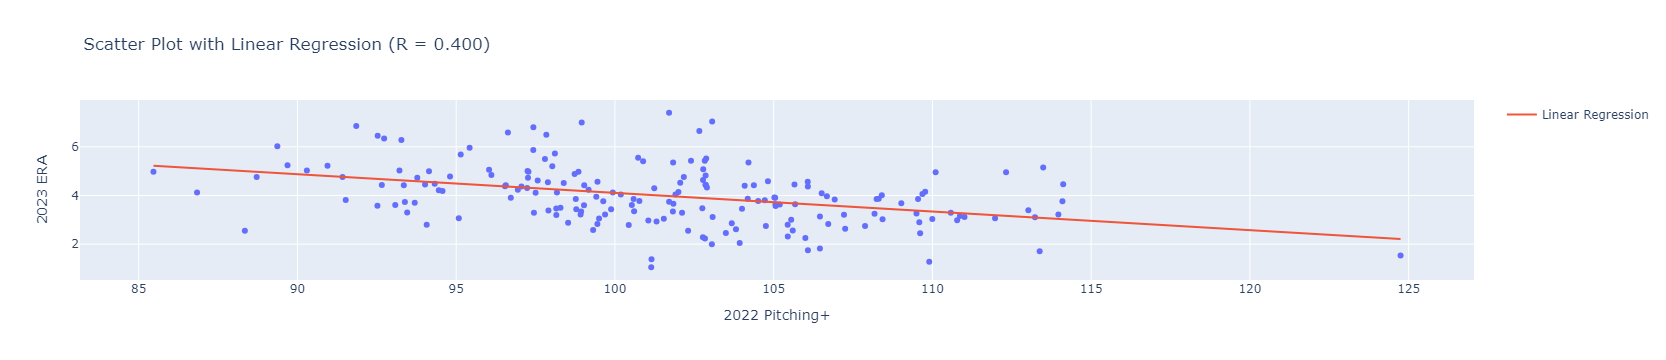

In [132]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Calculate R2
correlation_coefficient  = np.abs(np.corrcoef(df['Pitching+'], df['2023_ERA'])[0, 1])

# Create scatter plot
fig = px.scatter(df, x='Pitching+', y='2023_ERA', title=f'Scatter Plot with Linear Regression (R2={r_squared:.2f})',
                 labels={'Pitching+': '2022 Pitching+', '2023_ERA': '2023 ERA'},
                 hover_data=['player_name'])

# Add linear regression line
fig.add_trace(go.Scatter(x=df['Pitching+'], y=np.polyval(np.polyfit(df['Pitching+'], df['2023_ERA'],1), df['Pitching+']),
                         mode='lines', name='Linear Regression'))

fig.update_layout(title_text=f'Scatter Plot with Linear Regression (R = {correlation_coefficient:.3f})',
                  xaxis_title='2022 Pitching+',
                  yaxis_title='2023 ERA',
                  hovermode='closest')

fig.show()